![Scikit-learn logo](https://scipy-lectures.org/_images/scikit-learn-logo.png)

With [Scikit-learn](https://scikit-learn.org/stable/) you need to classify handwritten digits.


![MNIST data sample](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

# Loading the MNIST sample dataset
data = load_digits()

# Extracting Attributes / Features
X = data.data
print(X.shape)

# Extracting Target / Class Labels
y = data.target
print(y.shape)

(1797, 64)
(1797,)


# The dataset


## X of shape (1797, 64) and of type float64

There is a total of `1797` examples.

Each datapoint is a flattened 8x8 image of a digit, giving you a total of `64` features

## y of shape (1797,) and of type int64

The answer associated with each datapoint.

As there is `1797` examples, there is `1797` answers as well.

It is a one dimensional vector with the value of the hand written digit




In [13]:

# Let's explore the first example in the dataset:
i = 0
print(f"Here is the shape of the first example:")
print(f"{X[i].shape = }\n")

print(f"And here is its content:")
print(f"{X[i] = }\n")

# Let's have a look at its associated answer

print(f"The hand written digit for this answer is:")
print(f"{y[i] = }")

# The first example is an handwritten 0 !


Here is the shape of the first example:
X[i].shape = (64,)

And here is its content:
X[i] = array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

The hand written digit for this answer is:
y[i] = 0


If you are missing inspiration, here is a great place to start: [Sklearn documentation example](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

Good luck !

In [14]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# The classification

To apply a classifier on this data, we flatten the images making the entire
dataset of shape `(n_samples,n_features)` where
`n_samples` is the number of images and `n_features` each image's number of pixels

## Flatten the images

    For example: Becomes:
    00110 (4,4)  00110010101111100010 (1,20)
    01010
    11111
    00010

In [15]:
n_label = len(data.images)
#>> 1797

flatten_data = data.images.reshape((n_label, -1))
#>> [[ 0.  0.  5. ...  0.  0.  0.]
#>>  ...
#>>  [ 0.  0. 10. ... 12.  1.  0.]]

## Create a support vector classifier

Radial Basis Function (RBF) kernel hyper parameters: 
- A lower `gamma` increases accuracy but decreases performance.
- A lower `c` increases performance but decreases accuracy.

In [16]:
clf = svm.SVC(kernel = 'rbf', gamma=0.001, C=1.0)

> We can optimize our model precision b

## Split data into 50% train and 50% test subsets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
        flatten_data, data.target, test_size=0.5, random_state=0
        )

> We can optimize the shuffle quality by comparing each `avg macro` obtained with different `random_state` seed.

## Learn the digits on the train subset

In [18]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

## Predict the value of the digit on the test subset

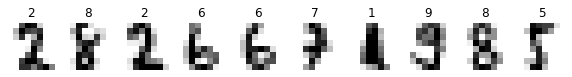

In [19]:
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{prediction}")
plt.show()

## Report 
### Main classification metrics

In [20]:
print(clf)
print(metrics.classification_report(y_test, predicted))

SVC(gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       0.99      1.00      0.99        76
           5       0.99      0.97      0.98       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.99      0.99      0.99        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



### Confusion matrix

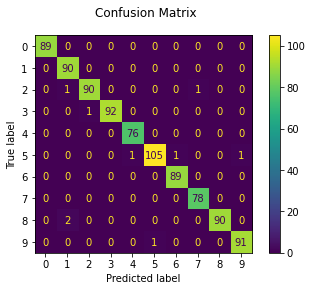

In [21]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp = disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Observation

Each value is detected with an accuracy greater than 97%, we deduce that the choice of our model and its kernel, are adequate.

## Experimentation

To be sure that the accuracy of the results is related to my program I make a test with erroneous samples by turning my test values on the horizontal and vertical axis.

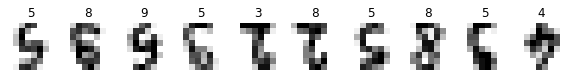

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       0.44      0.58      0.50        90
           2       0.73      0.50      0.59        92
           3       0.00      0.00      0.00        93
           4       0.61      0.91      0.73        76
           5       0.40      0.55      0.46       108
           6       0.00      0.00      0.00        89
           7       0.00      0.00      0.00        78
           8       0.43      0.82      0.57        92
           9       0.00      0.00      0.00        92

    accuracy                           0.43       899
   macro avg       0.36      0.43      0.38       899
weighted avg       0.36      0.43      0.38       899



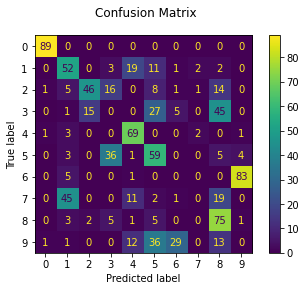

In [22]:
# Flip the digits vertically and horizontally
X_test = np.flipud(X_test)
X_test = np.fliplr(X_test)
y_test = np.flipud(y_test)

# Learn 
clf.fit(X_train, y_train)

# Predict 
predicted = clf.predict(X_test)
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{prediction}")
plt.show()
    
# Classification metrics    
print(metrics.classification_report(y_test, predicted))

# Confusion Matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp = disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Observation

We notice as we expected that the accuracy has drastically decreased, reaching an average of 36%. Logically, the '0' and '8' which have symmetry on both axes keep an accuracy higher than 75%. We also notice that the '6' is detected as a '9', as excpected. These results confirm an intuitive working of our model. We can also notice some intriguing results such as the '9' which is not detected as a '6' with as much accuracy as the '6->9' because the model tends to confuse it with a '5' probably because of the lower loop of the '5' which, too closed, makes it look like a '6'.

## Sources

- [developers.google.com](https://developers.google.com/machine-learning/glossary) - glossary
- [medium.com](https://medium.com/@himanshubeniwal/handwritten-digit-recognition-using-machine-learning-ad30562a9b64) - ml handwritten recon 
- [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) - main tutorial
- [youtu.be](https://youtu.be/FB5EdxAGxQg) - SVM
- [zestdesavoir.com](https://zestedesavoir.com/tutoriels/1760/un-peu-de-machine-learning-avec-les-svm/) - SVM
- [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) - RBF params
- [towarddatascience.com](https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167) - RBF params
- [medium.com](https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be) - RBF params
- [stackoverflow](https://stackoverflow.com/questions/58955816/difference-between-shuffle-and-random-state-in-train-test-split) - train-test-split method
- [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) - classification metrics
